# FINAL PROJECT 4:  Clustering (K-Means)

NATHANIA GUNAWAN        (PYTN-KS09-006) <BR>
BERLIANA PUTRI BETASARI (PYTN-KS09-025)

## <font color=#FF7913>A. Perkenalan

Kasus ini untuk mengembangkan segmentasi pelanggan untuk menentukan strategi pemasaran. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut.

Berikut Kamus Data untuk dataset Credit Card:

* CUSTID : Identifikasi pemegang Kartu Kredit (Kategorical)
* BALANCE : Saldo jumlah yang tersisa di akun mereka untuk melakukan pembelian 
* BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
* PURCHASES : Jumlah pembelian yang dilakukan dari akun
* ONEOFFPURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan
* INSTALLMENTSPURCHASES : Jumlah pembelian yang dilakukan secara angsuran
* CASHADVANCE : Uang muka yang diberikan oleh pengguna
* PURCHASESFREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
* ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
* PURCHASESINSTALLMENTSFREQUENCY : Seberapa sering pembelian dengan cara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
* CASHADVANCEFREQUENCY : Seberapa sering uang muka dibayarkan
* CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
* PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan
* CREDITLIMIT : Batas Kartu Kredit untuk pengguna
* PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
* MINIMUM_PAYMENTS : Jumlah minimum pembayaran yang dilakukan oleh pengguna
* PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
* TENURE : Masa berlaku layanan kartu kredit bagi pengguna

## <font color=#FF7913>B.Import Package

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from kneed import KneeLocator
from sklearn.decomposition import PCA

## <font color=#FF7913>C. Data Loading

### <font color=#6C88C4> Read Dataframe

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### <font color=#6C88C4> General Info of Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

General information of the data:
1. Semua kolom kecuali CUST_ID bertipe numerik dengan tipe data float64 dan int64.
2. Kolom CUST_ID bersifat kategorikal dengan tipe data object
3. Kolom BALANCEFREQUENCY bernilai antara 0 hingga 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. Kolom PURCHASESFREQUENCY bernilai antara 0 hingga 1 (1 = sering dibeli, 0 = tidak sering dibeli)
5. Kolom ONEOFFPURCHASESFREQUENCY bernilai antara 0 hingga 1 (1 = sering dibeli, 0 = tidak sering dibeli)
6. Kolom PURCHASESINSTALLMENTSFREQUENCY bernilai antara 0 hingga 1 (1 = sering dilakukan, 0 = tidak sering dilakukan)

## <font color=#FF7913>D. Data Cleaning

### <font color=#6C88C4> Checking Duplicate Data

In [4]:
df.duplicated().sum()

0

Tidak terdapat data yang duplikat

### <font color=#6C88C4> Checking Null Values, Filling Missing Data

In [5]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
CUST_ID,0,0.0
BALANCE,0,0.0
BALANCE_FREQUENCY,0,0.0
PURCHASES,0,0.0
ONEOFF_PURCHASES,0,0.0
INSTALLMENTS_PURCHASES,0,0.0
CASH_ADVANCE,0,0.0
PURCHASES_FREQUENCY,0,0.0
ONEOFF_PURCHASES_FREQUENCY,0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0


Pada dataset ini terdapat 2 kolom yang memiliki missing values, yaitu CREDIT_LIMIT dan MINIMUM_PAYMENTS. Namun, missing values pada kedua kolom tersebut jumlahnya kurang dari 10% keseluruhan dataset. Dengan demikian, untuk mengatasi missing values ini kita akan drop missing valuesnya saja (tidak di fill).

Kolom CUST_ID juga tidak akan digunakan dalam project ini sehingga dapat didrop.

### <font color=#6C88C4> Process Missing Data

In [6]:
df.dropna(subset=['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'],inplace=True)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### <font color=#6C88C4> Process Unecessary Column

In [7]:
df.drop(['CUST_ID'], axis=1,inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## <font color=#FF7913>E. Explorasi Data 

### <font color=#6C88C4> Checking Skewness Per Column

In [8]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [9]:
def printskew(feature):
    if -0.5 <= df[feature].skew() <= 0.5:
        print(feature, "Skewness:",df[feature].skew(), '\033[1m'+"fairly symmetrical"+'\033[0m')
    elif -1 <= df[feature].skew() < -0.5 or 0.5 <= df[feature].skew() <= 1:
        print(feature, "Skewness:",df[feature].skew(), '\033[1m'+"moderately skewed"+'\033[0m')
    else:
        print(feature, "Skewness:",df[feature].skew(), '\033[1m'+"highly skewed"+'\033[0m')

In [10]:
skewness = []
category = []
for feature in numerical_features:
    skewness.append(df[feature].skew())
    if -0.5 <= df[feature].skew() <= 0.5:
        category.append("fairly symmetrical")
    elif -1 <= df[feature].skew() < -0.5 or 0.5 <= df[feature].skew() <= 1:
        category.append("moderately skewed")
    else:
        category.append("highly skewed")

In [11]:
dv1 = pd.DataFrame({
    'Features':numerical_features,
    'Skewness':skewness,
    'Category':category
})
dv1 = dv1.set_index("Features") 

def highlight_cells(val, color_if_true, color_if_false):
    color = color_if_true if val == 'highly skewed' or val=='moderately skewed' else color_if_false
    return 'background-color: {}'.format(color)

dv1.style.applymap(highlight_cells, color_if_true='#FFB3BA', color_if_false='#BAFFC9', 
                  subset=['Category'])

,Skewness,Category
Features,,
BALANCE,2.374254,highly skewed
BALANCE_FREQUENCY,-2.084161,highly skewed
PURCHASES,8.055789,highly skewed
ONEOFF_PURCHASES,9.935776,highly skewed
INSTALLMENTS_PURCHASES,7.216133,highly skewed
CASH_ADVANCE,5.139629,highly skewed
PURCHASES_FREQUENCY,0.033041,fairly symmetrical
ONEOFF_PURCHASES_FREQUENCY,1.504234,highly skewed
PURCHASES_INSTALLMENTS_FREQUENCY,0.487753,fairly symmetrical


Hampir semua kolom bertipe highly skewed, kecuali PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY

***

### <font color=#6C88C4> Checking Distribution Per Column

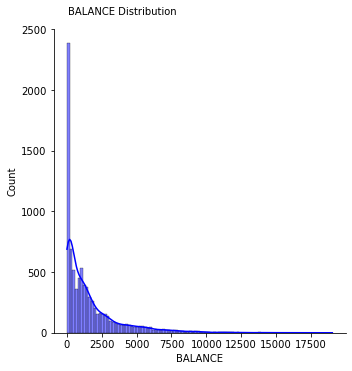

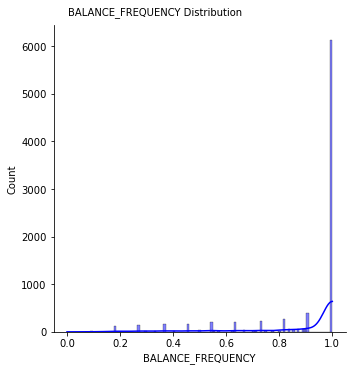

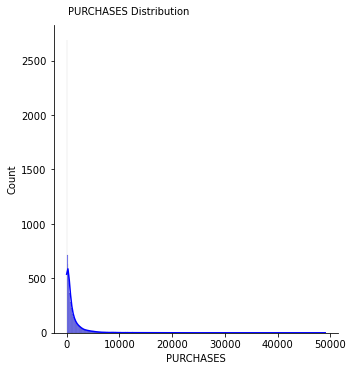

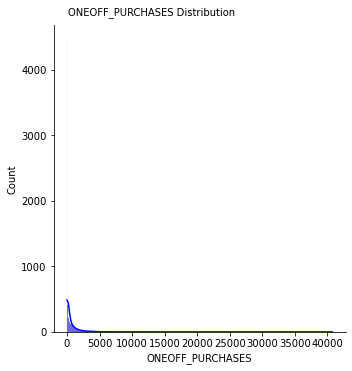

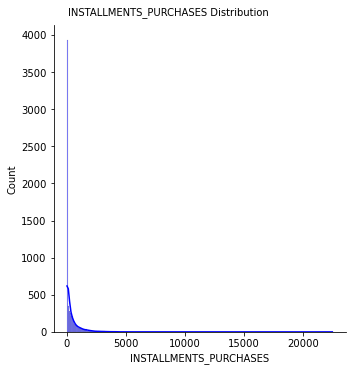

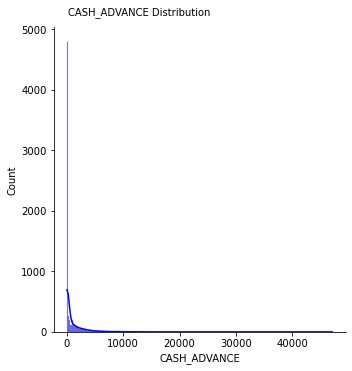

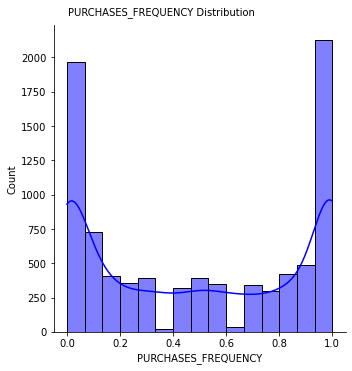

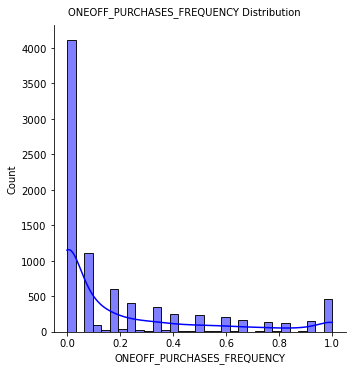

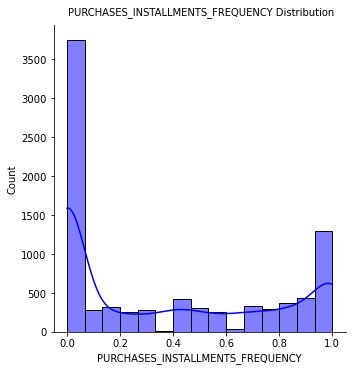

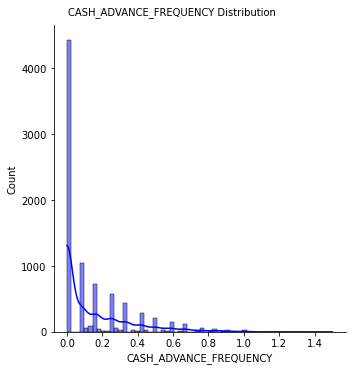

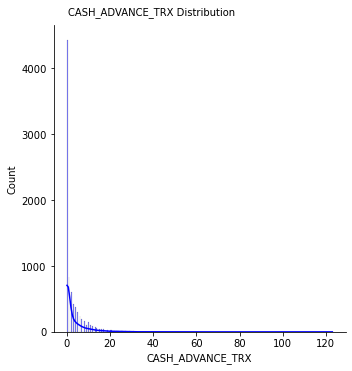

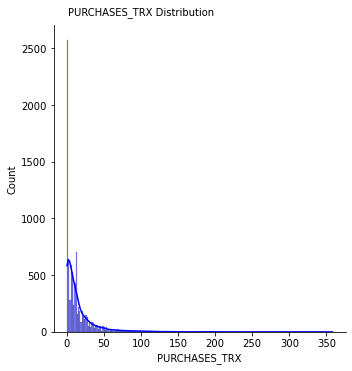

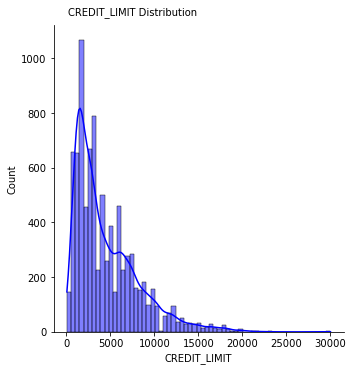

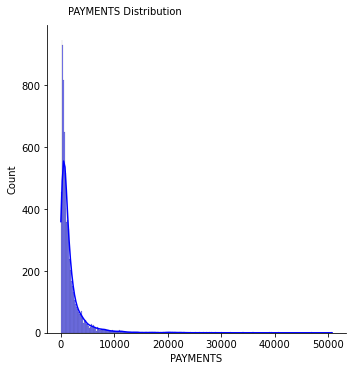

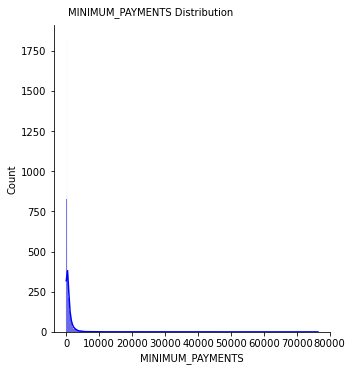

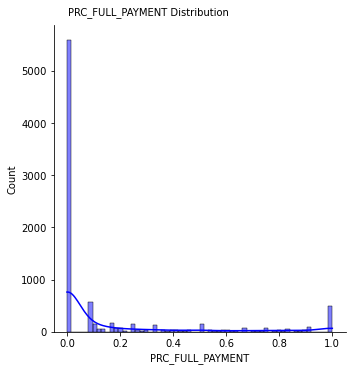

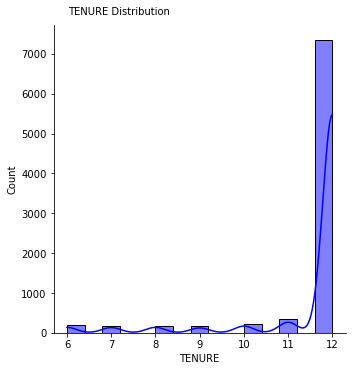

In [12]:
def plot_distribution(feature):
    sns.displot(x=feature, data=df, kde=True, color='Blue')
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontsize=10)
for feature in numerical_features:
    plot_distribution(feature)

Insights:
1. Bentuk distribusi BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENT_PURCHASES, CASH_ADVANCE, PAYMENTS, dan MINIMUM_PAYMENTS serupa. Hal ini mungkin dapat disebabkan karena rendahnya BALANCE sehingga mempengaruhi variabel-variabel lain.
2. Kebanyakan pengguna kartu kredit memiliki tenor sekitar 12 bulan.
3. Mayoritas pengguna kartu kredit memilih untuk tidak melakukan pembelanjaan sama sekali atau sangat sering melakukan pembelanjaan.
4. Dilihat dari grafik distribusi ONEOFF_PURCHASES dan INSTALLMENT_PURCHASES, pengguna kartu kredit lebih sering melakukan pembelajaan dengan cicilan dibandingkan tanpa cicilan.
5. Pengguna kartu kredit mayoritas memiliki limit di kisaran 0-5000

### <font color=#6C88C4> Checking Distribution Per Column

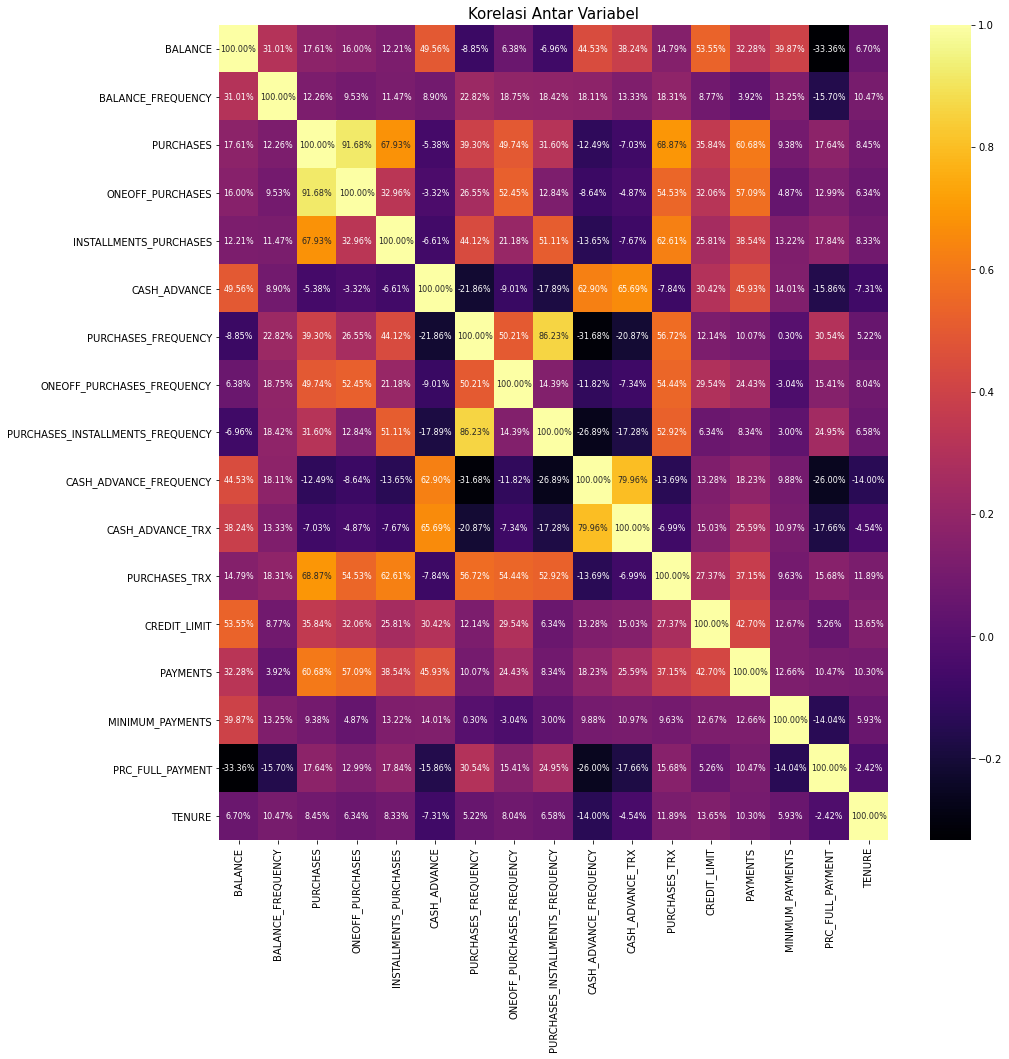

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2%',annot_kws={"size": 8},cmap="inferno")
plt.title("Korelasi Antar Variabel", loc='center',size ='15')
plt.show()

1. Variabel PURCHASES memiliki korelasi yang tinggi dengan PAYMENTS (60.68%), PURCHASE_TRX (68.87%), INSTALLMENT_PURCHASES (67.93%), dan ONEOFF_PURCHASES (91.68%).
2. Variabel BALANCE memiliki korelasi yang cukup tinggi dengan CREDIT_LIMIT (53.55%)

## <font color=#FF7913>F. Data Preprocessing

### <font color=#6C88C4> Split Data

Data yang akan digunakan untuk training adalah sebesar 75%, sedangkan 25% sisanya digunakan untuk testing

In [21]:
train1, test1 = train_test_split(df, test_size=0.25, random_state=2)

### <font color=#6C88C4> Scale Data

Proses standardization terhadap data train dan testing agar mean = 0 dan standar deviasi = 1

In [22]:
scaler = StandardScaler()
train = scaler.fit_transform(train1)
test = scaler.fit_transform(test1)

## <font color=#FF7913> G. Pendefinisian dan Pelatihan Model

### <font color=#6C88C4> Create and Fit Model

Model yang akan kita gunakan adalah Clustering K Means

**Elbow Curve**

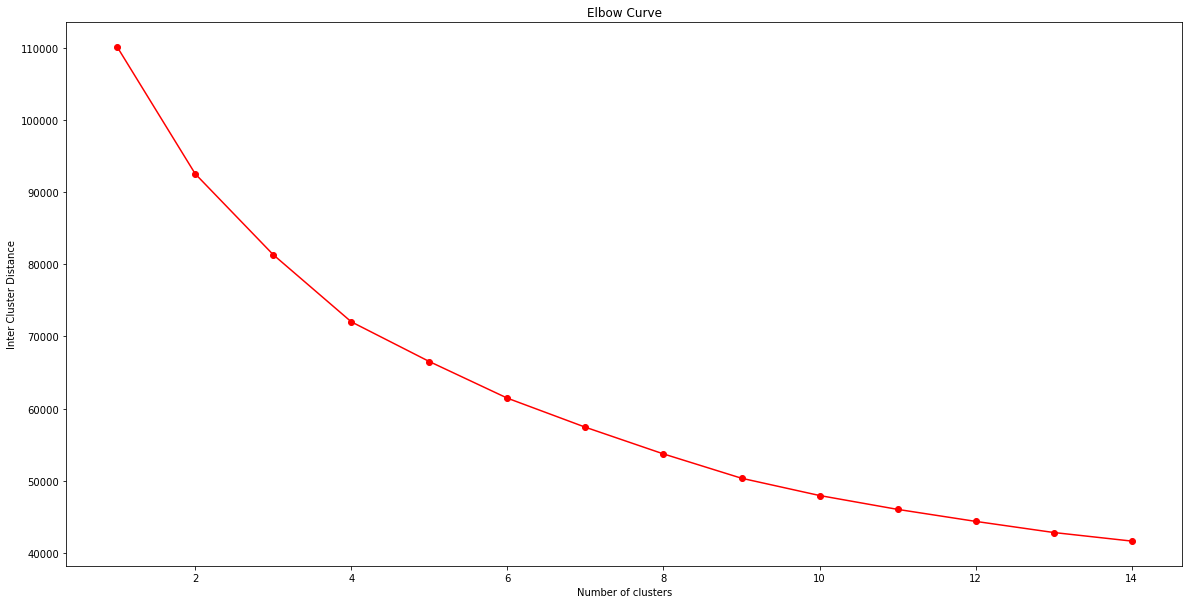

In [23]:
interclusterdistance = []

for clusters in range(1,15):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(train)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(20,10))
plt.plot(range(1, 15), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.title('Elbow Curve')
plt.show()

**Menentukan Titik Elbow Curve**

In [27]:
kl = KneeLocator(range(1, 15), interclusterdistance, curve = 'convex', direction = 'decreasing')
kl.elbow

5

Titik siku pada elbow curve di atas adalah 5. Artinya, jumlah cluster yang optimal adalah 5

**K-Means Modelling**

In [28]:
kmeans = KMeans(5)
kmeans.fit(train)
labels = kmeans.labels_

In [31]:
clusters = kmeans.predict(train)
train1['cluster'] = clusters
train1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3793,163.335524,0.545455,460.95,460.95,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0,2,1500.0,162.939482,77.604225,0.0,12,2
864,993.533549,1.000000,851.68,0.00,851.68,1515.648089,0.833333,0.000000,0.75,0.083333,4,12,1500.0,1660.242557,512.342306,0.0,12,1
2563,1026.201421,1.000000,0.00,0.00,0.00,244.888190,0.000000,0.000000,0.00,0.166667,2,0,1200.0,440.519737,320.383825,0.0,12,2
6910,2629.276828,1.000000,0.00,0.00,0.00,3492.909117,0.000000,0.000000,0.00,0.333333,7,0,3500.0,1478.753996,1863.940934,0.0,12,2
1767,10822.058110,1.000000,4850.35,2847.80,2002.55,0.000000,1.000000,0.916667,1.00,0.000000,0,208,15500.0,2740.094420,2621.071099,0.0,12,0


**PCA Visualization**

In [33]:
pca = PCA(2)
principalComponents = pca.fit_transform(train)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)

(6477, 2)


In [36]:
colors = {0: 'red', 1: 'blue', 2: 'green',3:'yellow', 4:'purple'}
final_df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = final_df.groupby(labels)

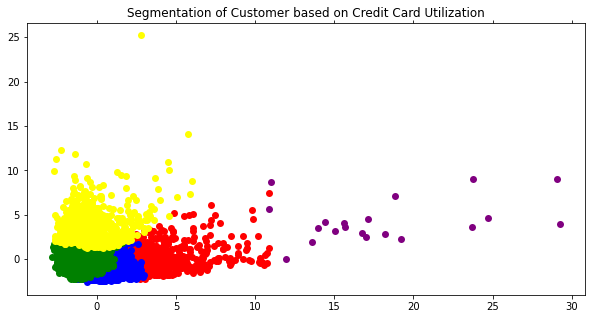

In [56]:
fig, ax = plt.subplots(figsize=(10, 5)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=7, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.set_title("Segmentation of Customer based on Credit Card Utilization")
plt.show()

### <font color=#6C88C4> Evaluasi Model

In [54]:
df_overall = pd.DataFrame()
a = train1.describe().loc[['mean']].T
df_overall['Overall_Res'] =  a['mean']

df_cluster_summary = train1.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_prof = df_cluster_summary.join(df_overall).reset_index()
df_prof.style.background_gradient(cmap='YlOrRd').hide_index()

Column Name,Metrics,0,1,2,3,4,Overall_Res
BALANCE,mean,2361.758876,722.732580,1100.658079,4533.430463,6611.928323,1578.953362
BALANCE_FREQUENCY,mean,0.983991,0.929069,0.820718,0.967039,0.950000,0.893270
PURCHASES,mean,4171.856723,903.830537,286.693587,498.027895,26595.843000,1022.521369
ONEOFF_PURCHASES,mean,2773.439212,313.829141,234.188746,316.425529,19392.432000,608.660840
INSTALLMENTS_PURCHASES,mean,1398.417511,590.304468,52.656127,181.723258,7203.411000,414.040148
CASH_ADVANCE,mean,502.639307,188.492256,620.231158,4670.145550,967.325352,993.871725
PURCHASES_FREQUENCY,mean,0.944854,0.864755,0.164361,0.286092,0.925000,0.495926
ONEOFF_PURCHASES_FREQUENCY,mean,0.739072,0.196815,0.097899,0.138155,0.750000,0.207686
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.710090,0.726621,0.064893,0.181279,0.787500,0.368223
CASH_ADVANCE_FREQUENCY,mean,0.071702,0.041961,0.121209,0.485788,0.037500,0.137087


1. Cluster 0: Pengguna kartu kredit pada cluster ini dapat dikatakan cukup aktif dalam melakukan transaksi. Dapat dilihat dari rata-rata PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY,  ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY yang cenderung tinggi dibandingkan cluster lainnya. Pengguna kartu kredit ini cenderung lebih sering menggunakan kartu kredit untuk transaksi sekali jalan dibandingkan cicilan. Dapat dilihat bahwa rata-rata INSTALLMENTS_PURCHASES lebih rendah dibandingkan ONEOFF_PURCHASES, begitupun juga dengan frekuensinya. 
2. Cluster 1: Pengguna kartu kredit pada cluster ini cenderung lebih sering menggunakan kartunya untuk transaksi cicilan. Dapat dilihat bahwa rata-rata INSTALLMENTS_PURCHASES lebih tinggi dibandingkan ONEOFF_PURCHASES, begitupun juga dengan frekuensinya. Akan tetapi, MINIMUM_PAYMENTS, CREDIT_LIMIT, dan BALANCE pada cluster ini cenderung sangat rendah dibandingkan yang lain. 
3. Cluster 2: Pengguna kartu kredit pada cluster ini dapat dikatakan kurang aktif dalam melakukan transaksi. Rata-rata balance pada cluster ini juga merupakan yang kedua terendah dibandingkan cluster lainnya. PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY pada cluster ini juga cenderung rendah jika dibandingkan yang lain. Limit kredit pada cluster ini juga merupakan yang tertinggi ketiga dibandingkan cluster lainnya. PAYMENTS pada cluster ini juga rendah dibandingkan yang lain.
4. Cluster 3: Pengguna kartu kredit pada cluster ini dapat dikatakan kurang aktif dalam melakukan transaksi. Rata-rata balance pada cluster ini merupakan yang tertinggi kedua dibandingkan cluster lainnya. Akan tetapi, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY pada cluster ini dapat dikatakan rendah jika dibandingkan yang lain. Limit kredit pada cluster ini juga merupakan yang tertinggi ketiga dibandingkan cluster lainnya.
5. Cluster 4: Pengguna kartu kredit pada cluster ini dapat dikatakan sangat aktif dalam melakukan transaksi. Dapat dilihat bahwa dalam cluster ini rata-rata balance, limit kredit, dan minimum payments penggunanya merupakan yang paling tinggi dibandingkan yang lain. Para pengguna kartu kredit dalam cluster ini juga aktif dalam melakukan transaksi baik dengan cicilan maupun langsung, karena rata-rata dari variabel PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY juga merupakan yang paling tinggi dibandingkan cluster lain. Cluster ini juga memiliki tenur yang paling tinggi yaitu 12.

## <font color=#FF7913> H. Kesimpulan

**EDA**

1. Bentuk distribusi BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENT_PURCHASES, CASH_ADVANCE, PAYMENTS, dan MINIMUM_PAYMENTS serupa. Hal ini mungkin dapat disebabkan karena rendahnya BALANCE sehingga mempengaruhi variabel-variabel lain.
2. Kebanyakan pengguna kartu kredit memiliki tenor sekitar 12 bulan.
3. Mayoritas pengguna kartu kredit memilih untuk tidak melakukan pembelanjaan sama sekali atau sangat sering melakukan pembelanjaan.
4. Dilihat dari grafik distribusi ONEOFF_PURCHASES dan INSTALLMENT_PURCHASES, pengguna kartu kredit lebih sering melakukan pembelajaan dengan cicilan dibandingkan tanpa cicilan.
5. Pengguna kartu kredit mayoritas memiliki limit di kisaran 0-5000
6. Variabel PURCHASES memiliki korelasi yang tinggi dengan PAYMENTS (60.68%), PURCHASE_TRX (68.87%), INSTALLMENT_PURCHASES (67.93%), dan ONEOFF_PURCHASES (91.68%).
7. Variabel BALANCE memiliki korelasi yang cukup tinggi dengan CREDIT_LIMIT (53.55%)

**K-MEANS CLUSTERING**

1. Cluster 0: Pengguna kartu kredit pada cluster ini dapat dikatakan cukup aktif dalam melakukan transaksi. Dapat dilihat dari rata-rata PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY,  ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY yang cenderung tinggi dibandingkan cluster lainnya. Pengguna kartu kredit ini cenderung lebih sering menggunakan kartu kredit untuk transaksi sekali jalan dibandingkan cicilan. Dapat dilihat bahwa rata-rata INSTALLMENTS_PURCHASES lebih rendah dibandingkan ONEOFF_PURCHASES, begitupun juga dengan frekuensinya. 
2. Cluster 1: Pengguna kartu kredit pada cluster ini cenderung lebih sering menggunakan kartunya untuk transaksi cicilan. Dapat dilihat bahwa rata-rata INSTALLMENTS_PURCHASES lebih tinggi dibandingkan ONEOFF_PURCHASES, begitupun juga dengan frekuensinya. Akan tetapi, MINIMUM_PAYMENTS, CREDIT_LIMIT, dan BALANCE pada cluster ini cenderung sangat rendah dibandingkan yang lain. 
3. Cluster 2: Pengguna kartu kredit pada cluster ini dapat dikatakan kurang aktif dalam melakukan transaksi. Rata-rata balance pada cluster ini juga merupakan yang kedua terendah dibandingkan cluster lainnya. PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY pada cluster ini juga cenderung rendah jika dibandingkan yang lain. Limit kredit pada cluster ini juga merupakan yang tertinggi ketiga dibandingkan cluster lainnya. PAYMENTS pada cluster ini juga rendah dibandingkan yang lain.
4. Cluster 3: Pengguna kartu kredit pada cluster ini dapat dikatakan kurang aktif dalam melakukan transaksi. Rata-rata balance pada cluster ini merupakan yang tertinggi kedua dibandingkan cluster lainnya. Akan tetapi, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY pada cluster ini dapat dikatakan rendah jika dibandingkan yang lain. Limit kredit pada cluster ini juga merupakan yang tertinggi ketiga dibandingkan cluster lainnya.
5. Cluster 4: Pengguna kartu kredit pada cluster ini dapat dikatakan sangat aktif dalam melakukan transaksi. Dapat dilihat bahwa dalam cluster ini rata-rata balance, limit kredit, dan minimum payments penggunanya merupakan yang paling tinggi dibandingkan yang lain. Para pengguna kartu kredit dalam cluster ini juga aktif dalam melakukan transaksi baik dengan cicilan maupun langsung, karena rata-rata dari variabel PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY juga merupakan yang paling tinggi dibandingkan cluster lain. Cluster ini juga memiliki tenur yang paling tinggi yaitu 12.